In [1]:
import geopandas as gpd
import shapely.geometry

In [2]:
nat = gpd.read_file('../../possibility-for-electricity-autarky/build/national/units.geojson')

In [3]:
nat.head()

,country_code,id,name,type,proper,geometry
0,AUT,AUT,Austria,country,1,"(POLYGON ((10.45438 47.55575, 10.45102 47.5546..."
1,BEL,BEL,Belgium,country,1,"(POLYGON ((5.10218 51.429, 5.08661 51.41121, 5..."
2,BGR,BGR,Bulgaria,country,1,"(POLYGON ((22.67516 44.21566, 22.69378 44.2045..."
3,HRV,HRV,Croatia,country,1,"(POLYGON ((16.59681 46.4759, 16.60628 46.4751,..."
4,CYP,CYP,Cyprus,country,1,"(POLYGON ((34.57428 35.66181, 34.57314 35.6548..."


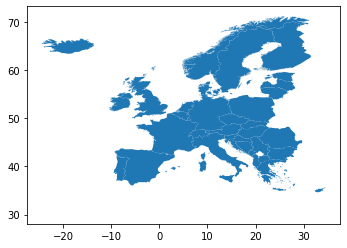

In [4]:
nat.plot()

In [26]:
foo = gpd.read_file('../../possibility-for-electricity-autarky/build/NUTS_RG_01M_2010_4326/')

In [28]:
def _to_multi_polygon(geometry):
    if isinstance(geometry, dict):
        geometry = shapely.geometry.shape(geometry)
    if isinstance(geometry, shapely.geometry.polygon.Polygon):
        return shapely.geometry.MultiPolygon(polygons=[geometry])
    else:
        return geometry
    
foo.geometry = foo.geometry.buffer(0).map(_to_multi_polygon)

In [14]:
foo.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NUTS_NAME,FID,geometry
0,DE80I,3,DE,Uecker-Randow,DE80I,"(POLYGON ((13.76656 53.68498, 13.76454 53.6886..."
1,DE80C,3,DE,Müritz,DE80C,"(POLYGON ((12.33095 53.31823, 12.34201 53.3317..."
2,UKD53,3,UK,Sefton,UKD53,"(POLYGON ((-3.00874 53.43841, -3.00874 53.4392..."
3,DE804,3,DE,"Schwerin, Kreisfreie Stadt",DE804,"(POLYGON ((11.30194 53.65295, 11.30356 53.6587..."
4,UKD32,3,UK,Greater Manchester North,UKD32,"(POLYGON ((-2.48971 53.46017, -2.48984 53.4622..."


In [21]:
foo.drop('FID', axis=1).to_file(
        '../../possibility-for-electricity-autarky/build/raw-nuts.gpkg', driver='GPKG'
    )

In [29]:
(~foo.is_valid).sum()

0

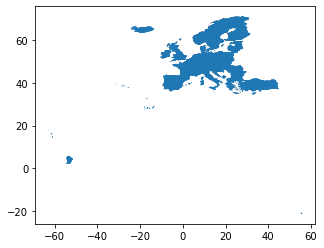

In [31]:
foo.plot()